> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VII: Neural Networks

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-03-22 00:05:04.047144


## Problem description

We will implement a simple neural network for binary classification. Let me first see a behavior of a simple logistic regression method on a $\text{moon}$ dataset. This dataset has been widely used to test nonlinear classifier and clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [ ]:
# dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise = 0.25)
print(X.shape, y.shape)


Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

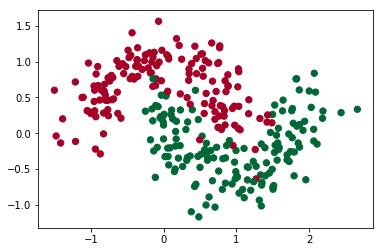

In [4]:
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.RdYlGn)

It seems hard to to classify this dataset with linear classifiers such as a logistic regression method. That is, it is hard to draw a straight line (i.e., decision boundaries) to divide training sets into two different regions pefectly. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [5]:
import sklearn.linear_model
from P07 import plot_decision_boundary

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use a help function ($\texttt{plot_decision_boundary}$) provided that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers. In logistic regression, it is the output value of sigmoid functions. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are training datasets and color for each label in the dataset, respectively. See the example below.

In [6]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Logistic Regression')

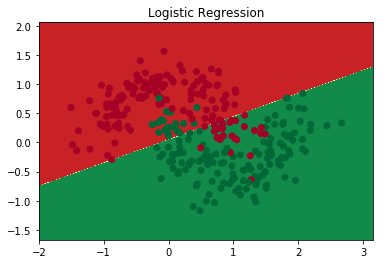

In [7]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X, color = y)
plt.title("Logistic Regression")

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a simple neural network and check that it gives a nonlinear classifier. The network we will implement consists series of fully connected layers followed by nonlinear activation functions. 

### I. Neural networks using gradiend descent.
(*70 points*) P1.1 Implement a multilayer perceptron method using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset.

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$ is a rectified linear unit and $z_1$ is an output of the first hidden layer. 
 
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = \sigma(H_2)$ where $\sigma$ is a sigmoid function and $z_2$ is an output of the second hidden layer.    
 
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > $W$ and $b$ are weights and bias, respectively.   
 
 > Initialization for weight: Standard normal (use $\texttt{np.random.randn}$.)
 
 > Initialization for bias: 0   
 
 > Input size: 2
 
 > The first hidden layer size: 10
 
 > The second hidden layer size: 10
 
 > Output size: 2
 
 > Loss function: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 iff the training sample belongs to the class $k$ and 0 otherwise.   
 > Total loss : summation of above for all training samples.   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)}$   
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.
 
 > Optimization: Gradient descent
 
 > Learning rate = 0.001
 
 > Number of epochs = 50000

In [8]:
from P07 import build_model, predict

In [9]:
y_onehot = np.eye(X.shape[1])[y]
X.shape, y_onehot.shape

((300, 2), (300, 2))

In [10]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,2,3]])

ay = np.array([[1,0,0],[0,1,0],[0,1,0],[0,0,1]])
ay_hat = np.array([[0.1, 0.2, 0.7],[0.3, 0.4, 0.3], [0.2, 0.5, 0.3], [0.2, 0.2, 0.6]])
(ay_hat - ay).mean(axis = 0, keepdims = True), (ay_hat - ay)

(array([[-0.05 , -0.175,  0.225]]), array([[-0.9,  0.2,  0.7],
        [ 0.3, -0.6,  0.3],
        [ 0.2, -0.5,  0.3],
        [ 0.2,  0.2, -0.4]]))

In [11]:
# input layer dimensionality
nn_input_dim = 2
# output layer dimensionality
nn_output_dim = 2
# first hidden layer dimensionality
nn_hdim1 = 10
# second hidden layer dimensionality
nn_hdim2 = 10
# learning rate 
lr = 0.001 
# epoch number
epoch = 50000

Loss (iteration 1000): 32.035125
Loss (iteration 2000): 28.308372
Loss (iteration 3000): 25.893237
Loss (iteration 4000): 23.770380
Loss (iteration 5000): 22.142126
Loss (iteration 6000): 20.959754
Loss (iteration 7000): 20.007165
Loss (iteration 8000): 19.172789
Loss (iteration 9000): 18.430829
Loss (iteration 10000): 17.780176
Loss (iteration 11000): 17.191476
Loss (iteration 12000): 16.663122
Loss (iteration 13000): 16.155466
Loss (iteration 14000): 15.621571
Loss (iteration 15000): 15.013518
Loss (iteration 16000): 14.315030
Loss (iteration 17000): 13.552116
Loss (iteration 18000): 12.713145
Loss (iteration 19000): 11.843193
Loss (iteration 20000): 11.003085
Loss (iteration 21000): 10.261459
Loss (iteration 22000): 9.612905
Loss (iteration 23000): 9.074164
Loss (iteration 24000): 8.608464
Loss (iteration 25000): 8.202224
Loss (iteration 26000): 7.855370
Loss (iteration 27000): 7.546000
Loss (iteration 28000): 7.266445
Loss (iteration 29000): 7.022518
Loss (iteration 30000): 6.80270

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

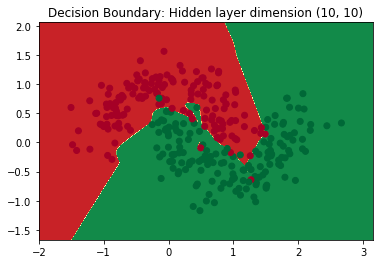

In [12]:
# Build a model with a 3-dimensional hidden layer
model, loss = build_model(X, y_onehot, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                          lr, epoch, print_loss=True, init_type='randn')
# keys = cache.keys()
# for key in keys:
#     print(key)
#     print(cache[key])
#     print('------' * 10)
# for key in model.keys():
#     print(key)
#     print(model[key])
#     print('------' * 10)
# for key in gradients.keys():
#     print(key)
#     print(gradients[key])
#     print('------' * 10)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), X, y)
plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim1, nn_hdim2))

(*5 points*) P1.2 Plot training losses over the number of epochs. 

Text(0, 0.5, 'Training loss')

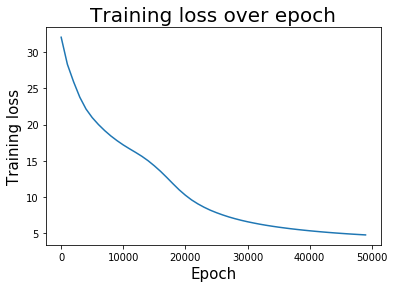

In [13]:
plt.plot(np.arange(len(loss)) * 1000, loss)
plt.title('Training loss over epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Training loss', fontsize=15)

### II. Play with your networks
(*5 points*) P2.1 Change size of hidden layers as follows, and plot decision boundaries. 
(1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are size of first and second hidden layers, respectively. 

In [14]:
from P07 import predict

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


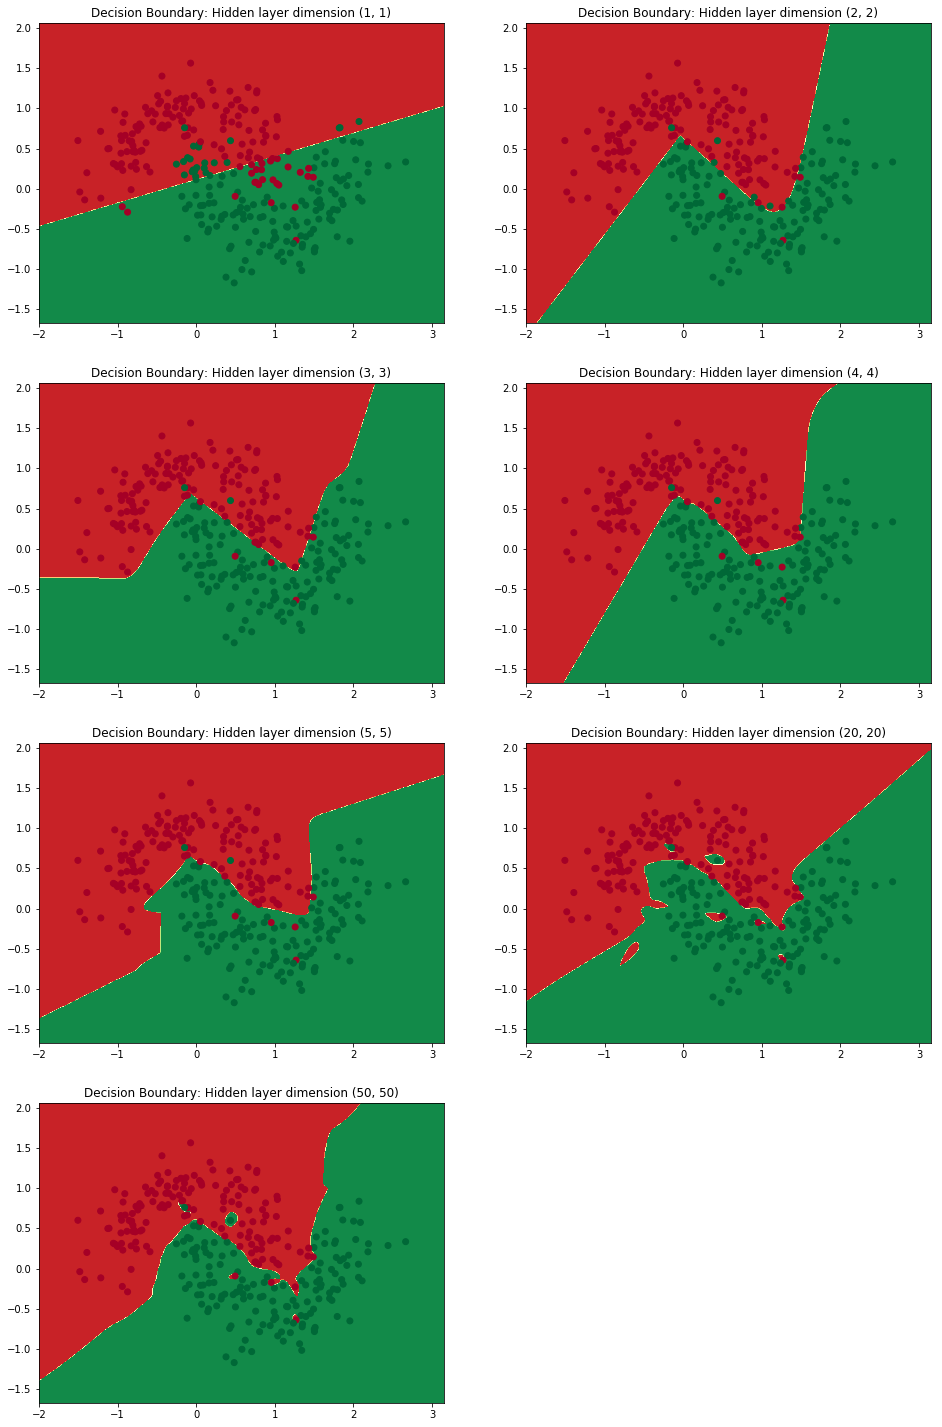

In [15]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim, nn_hdim))
    model, _ = build_model(X, y_onehot, nn_input_dim, nn_hdim, nn_hdim, nn_output_dim,
                           lr, epoch, False, 'randn')
    plot_decision_boundary(lambda x: predict(model, x), X, y)
    print("Learning NN: Hidden layer dimension (%d, %d) ... done" % (nn_hdim, nn_hdim))
plt.show()